<a href="https://colab.research.google.com/github/ehpub/KFQ_DL_2023-/blob/main/2023_kfq_%EB%94%A5%EB%9F%AC%EB%8B%9D_CNN_Arch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 교재: https://www.gilbut.co.kr/book/view?bookcode=BN003496

In [1]:
from tensorflow import keras
from keras import layers

In [2]:
inputs = keras.Input(shape=(32,32,3))
x = layers.Conv2D(32,3,activation='relu')(inputs)
resudual = x
x = layers.Conv2D(64,3,activation='relu',padding='same')(x)
resudual = layers.Conv2D(64,1)(resudual)
x = layers.add([x,resudual])

In [3]:
inputs = keras.Input(shape=(32,32,3))
x = layers.Conv2D(32,3,activation='relu')(inputs)
resudual = x
x = layers.Conv2D(64,3,activation='relu',padding='same')(x)
x = layers.MaxPooling2D(2,padding='same')(x)
resudual = layers.Conv2D(64,1,strides=2)(resudual)
x = layers.add([x,resudual])
model = keras.Model(inputs,x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 30, 30, 32)   896         ['input_2[0][0]']                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 30, 30, 64)   18496       ['conv2d_3[0][0]']               
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 15, 15, 64)   0           ['conv2d_4[0][0]']               
                                                                                              

In [4]:
def residual_block(x,filters,pooling=False):
  residual = x
  x = layers.Conv2D(filters,3,activation='relu',padding='same')(x)
  x = layers.Conv2D(filters,3,activation='relu',padding='same')(x)
  if pooling:
    x = layers.MaxPooling2D(2,padding='same')(x)
    residual = layers.Conv2D(filters,1,strides=2)(residual)
  elif filters!=residual.shape[-1]:
    residual = layers.Conv2D(filters,1)(residual)
  x = layers.add([x,residual])
  return x

In [5]:
inputs = keras.Input(shape=(32,32,3))
x = layers.Rescaling(1./255)(inputs)
x = residual_block(x,filters=32,pooling=True)
x = residual_block(x,filters=64,pooling=True)
x = residual_block(x,filters=128,pooling=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 32, 32, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 32, 32, 32)   896         ['rescaling[0][0]']              
                                                                                                  
 conv2d_7 (Conv2D)              (None, 32, 32, 32)   9248        ['conv2d_6[0][0]']               
                                                                                            

## 배치 정규화

In [6]:
from keras import applications

In [7]:
dir(applications)

['ConvNeXtBase',
 'ConvNeXtLarge',
 'ConvNeXtSmall',
 'ConvNeXtTiny',
 'ConvNeXtXLarge',
 'DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'EfficientNetV2B0',
 'EfficientNetV2B1',
 'EfficientNetV2B2',
 'EfficientNetV2B3',
 'EfficientNetV2L',
 'EfficientNetV2M',
 'EfficientNetV2S',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'ResNet50',
 'ResNet50V2',
 'ResNetRS101',
 'ResNetRS152',
 'ResNetRS200',
 'ResNetRS270',
 'ResNetRS350',
 'ResNetRS420',
 'ResNetRS50',
 'VGG16',
 'VGG19',
 'Xception',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'convnext',
 'densenet',
 'efficientnet',
 'efficientnet_v2',
 '

In [8]:
model = applications.ResNet50()
model.summary()

102967424/102967424 [==============================] - 6s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [9]:
import gdown

In [10]:
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From: https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
To: /content/dogs-vs-cats.zip
100%|██████████| 852M/852M [00:03<00:00, 236MB/s]


'dogs-vs-cats.zip'

In [11]:
!unzip -qq dogs-vs-cats.zip

In [12]:
!unzip -qq train.zip

In [13]:
import os,shutil,pathlib

In [14]:
original_dir = pathlib.Path('train')
new_base_dir = pathlib.Path('cats_vs_dogs_small')

In [15]:
def make_subset(subset_name,start_index,end_index):
  for category in ("cat","dog"):
    dir = new_base_dir/subset_name/category
    os.makedirs(dir)
    fnames= [f'{category}.{i}.jpg' for i in range(start_index,end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir/fname,
                      dst=dir/fname)

In [16]:
make_subset("train",start_index=0,end_index=1000)
make_subset("validation",start_index=1000,end_index=1500)
make_subset("test",start_index=1500,end_index=2500)

In [17]:
from tensorflow.keras.utils import image_dataset_from_directory

In [18]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [19]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [20]:
inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs) #데이터 증식
x = layers.Rescaling(1/255.)(x) #Min-Max Scaling
x = layers.Conv2D(32,5,use_bias=False)(x)
for size in[32,64,128,256,512]:
  residual = x
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.SeparableConv2D(size,3,padding='same',use_bias=False)(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.SeparableConv2D(size,3,padding='same',use_bias=False)(x)
  x = layers.MaxPooling2D(3,strides=2,padding='same')(x)
  residual = layers.Conv2D(size,1,strides=2,padding='same')(residual)
  x = layers.add([x,residual])
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)

In [21]:
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])
mcp = keras.callbacks.ModelCheckpoint(
    filepath='convnet_from_scratch_with_argumentation.keras',
    save_best_only=True
)
hist = model.fit(train_dataset,
                 epochs=10,
                 validation_data = validation_dataset,
                 callbacks=[mcp])

Epoch 1/10
63/63 [==============================] - 34s 179ms/step - loss: 0.7110 - accuracy: 0.5480 - val_loss: 0.7049 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 9s 145ms/step - loss: 0.6572 - accuracy: 0.5960 - val_loss: 0.7025 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 11s 163ms/step - loss: 0.6539 - accuracy: 0.6095 - val_loss: 0.7024 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 9s 146ms/step - loss: 0.6487 - accuracy: 0.6195 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 10s 148ms/step - loss: 0.6325 - accuracy: 0.6390 - val_loss: 0.7479 - val_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 10s 150ms/step - loss: 0.6154 - accuracy: 0.6590 - val_loss: 0.7586 - val_accuracy: 0.5000
Epoch 7/10
63/63 [==============================] - 10s 148ms/step - loss: 0.6090 - accuracy: 0.6770 - val_loss: 0.6990 - val_accuracy: 0.5380
E

In [22]:
model = keras.models.load_model('convnet_from_scratch_with_augmentation.keras')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                           

In [23]:
from keras.utils import load_img,img_to_array

In [24]:
def path_to_input_image(path):
  return img_to_array(load_img(path,target_size=(180,180)))

In [26]:
import matplotlib.pyplot as plt

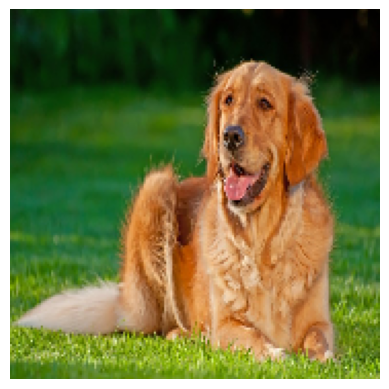

In [28]:
img_tensor = path_to_input_image('dog.jpg')
plt.axis('off')
plt.imshow(img_tensor.astype('uint8'))
plt.show()

In [29]:
img_tensor = img_tensor.reshape(1,180,180,3)

In [30]:
model.layers

In [31]:
l3 = model.layers[3]
l3

In [32]:
l3.input

<KerasTensor: shape=(None, 180, 180, 3) dtype=float32 (created by layer 'rescaling_1')>

In [33]:
l3.output

<KerasTensor: shape=(None, 178, 178, 32) dtype=float32 (created by layer 'conv2d_5')>

In [34]:
dir(l3)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_auto_config',
 '_auto_get_config',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_build_input_shape',
 '_call_spec',
 '_callable_losses',
 '_captured_weight_regularizer',
 '_cast_single_input',
 '_channels_first',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compute_causal_padding',
 '_compute_dtype',
 '_compute_dtype_object',
 '_dedup_weights',
 '_deferred_dependencies',
 '_delete_tracking',

In [35]:
from keras import layers

In [37]:
layer_outputs =[]
layer_names=[]
for layer in model.layers:
  if isinstance(layer,(layers.Conv2D, layers.MaxPooling2D)):
    layer_outputs.append(layer.output)
    layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input,
                               outputs=layer_outputs)

In [38]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 1s 1000ms/step


In [39]:
fla = activations[0]
fla.shape

(1, 178, 178, 32)

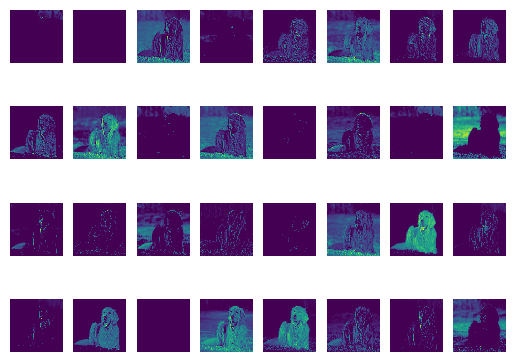

In [45]:
_,axs = plt.subplots(nrows=4,ncols=8)
for i in range(32):
  axs[i//8][i%8].axis('off')
  axs[i//8][i%8].matshow(fla[0,:,:,i])
plt.show()

In [46]:
la2 = activations[1]
la2.shape

(1, 89, 89, 32)

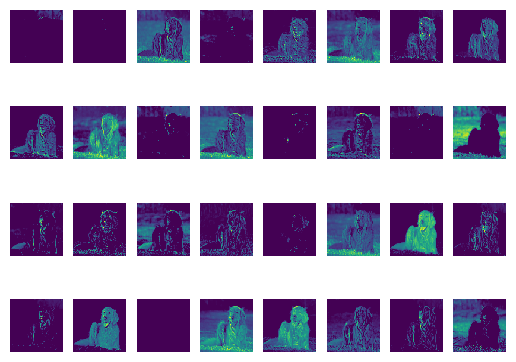

In [50]:
_,axs = plt.subplots(nrows=4,ncols=8)
for i in range(32):
  axs[i//8][i%8].axis('off')
  axs[i//8][i%8].matshow(la2[0,:,:,i])
plt.show()

In [51]:
la3 = activations[2]
la3.shape

(1, 87, 87, 64)

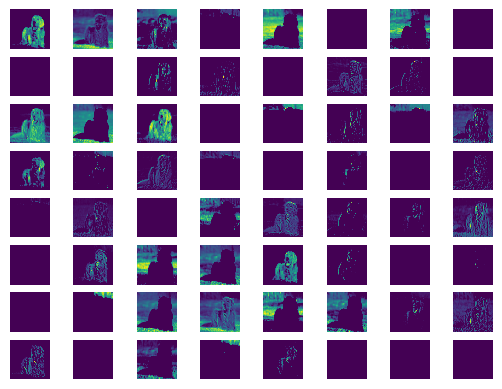

In [52]:
_,axs = plt.subplots(nrows=la3.shape[-1]//8,ncols=8)
for i in range(la3.shape[-1]):
  axs[i//8][i%8].axis('off')
  axs[i//8][i%8].matshow(la3[0,:,:,i])

plt.show()

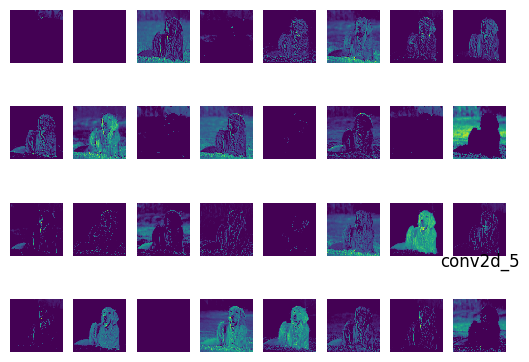

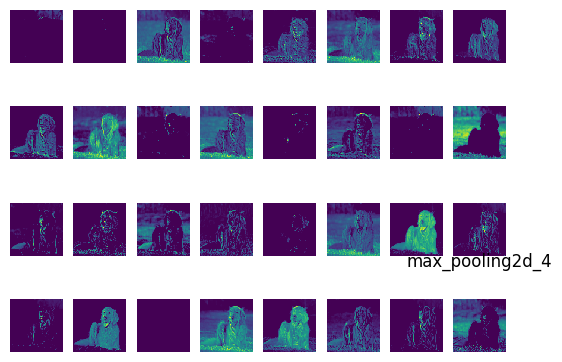

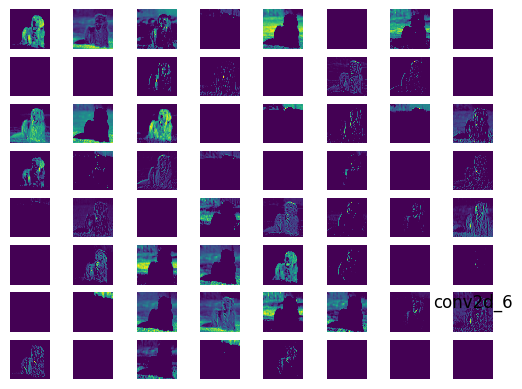

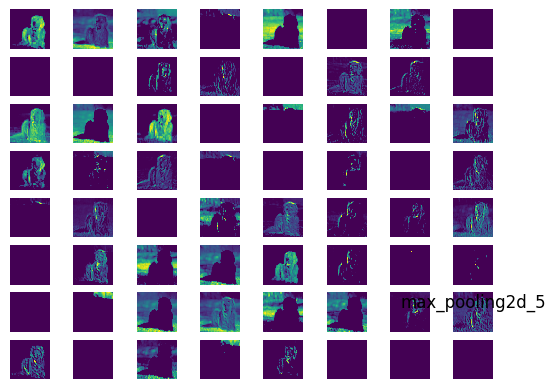

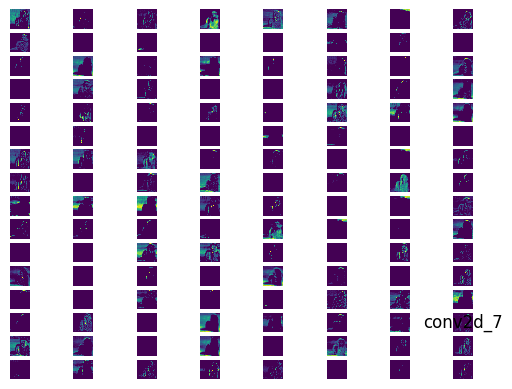

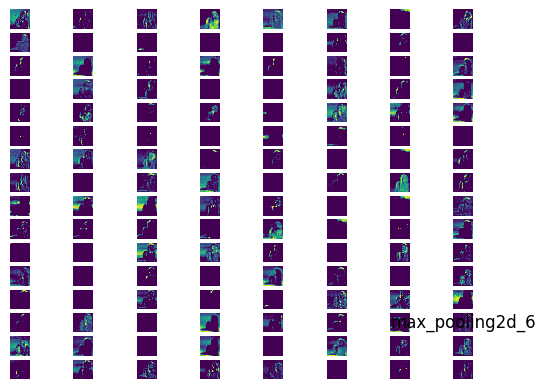

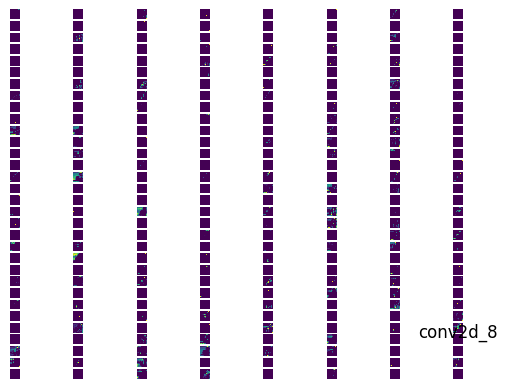

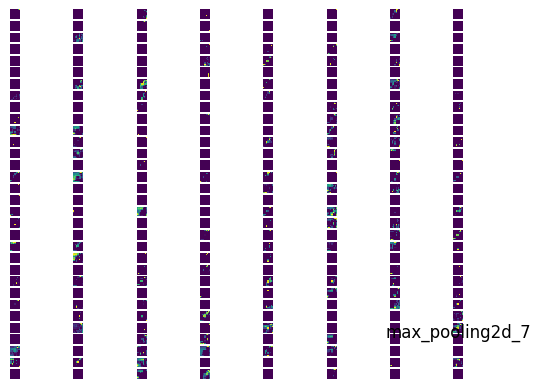

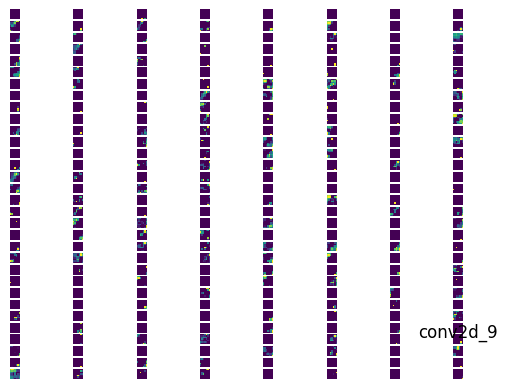

In [53]:
for ai, lat in enumerate(activations):
  _,axs = plt.subplots(nrows=lat.shape[-1]//8,ncols=8)
  for i in range(lat.shape[-1]):
    axs[i//8][i%8].axis('off')
    axs[i//8][i%8].matshow(lat[0,:,:,i])
  plt.title(layer_names[ai])
  plt.show()

In [55]:
model = applications.xception.Xception(
    weights='imagenet',
    include_top=False
)

83683744/83683744 [==============================] - 4s 0us/step


In [56]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_6[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                        

In [57]:
layer_name = 'block3_sepconv1'
layer = model.get_layer(name=layer_name)
layer.input, layer.output

(<KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block3_sepconv1_act')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_sepconv1')>)

In [58]:
feature_extractor = keras.Model(model.input,layer.output)

In [59]:
activation = keras.applications.xception.preprocess_input(img_tensor)

In [61]:
ai = activation.reshape(180,180,3).astype('uint8')

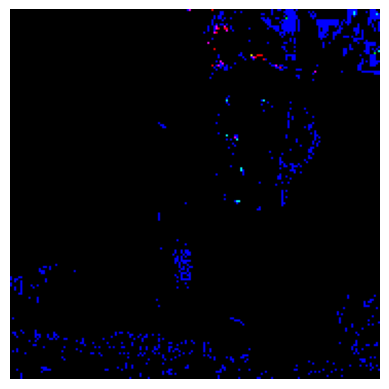

In [63]:
plt.axis('off')
plt.imshow(ai)
plt.show()

In [64]:
import tensorflow as tf

In [65]:
def compute_loss(image,filter_index):
  activation = feature_extractor(image)
  filter_activation = activation[:,2:-2,2:-2,filter_index]
  return tf.reduce_mean(filter_activation)

In [66]:
# to be defined ...